<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/3_rnn_sine_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)

In [5]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df.head(3)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669


In [8]:
test_percent = 0.1

In [9]:
len(df)*test_percent

50.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_ind = int(len(df) - test_point)

In [12]:
test_ind

451

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
# scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [16]:
# only fit train data
scaler.fit(train)

MinMaxScaler()

In [17]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
# Test series generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [22]:
len(scaled_train)


451

In [23]:
len(generator) # n_input = 2

449

In [24]:
X,y = generator[0], # X , given two val, y, the predicted val

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [31]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [32]:
X,y = generator[0]

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03]
Predict this y: 
 [[0.02053313]]


## Create the Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [30]:
# using one feature in our time series
n_features = 1

In [34]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 6s 11ms/step - loss: 0.0042
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 1.6650e-05
Epoch 3/5
401/401 [==============================] - 3s 8ms/step - loss: 0.0011
Epoch 4/5
401/401 [==============================] - 5s 12ms/step - loss: 4.2397e-05
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 2.4909e-05


In [37]:
model.history.history.keys()

dict_keys(['loss'])

<Axes: >

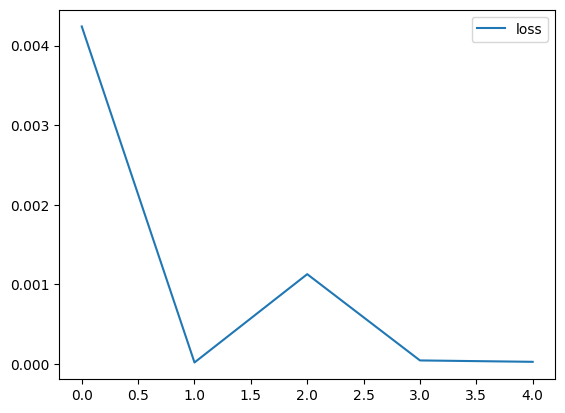

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:
# evaluate

first_eval_batch = scaled_train[-length:]

In [41]:
first_eval_batch[:5]


array([[0.83740582],
       [0.7988817 ],
       [0.75737124],
       [0.7132892 ],
       [0.66707605]])

In [42]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [43]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 364ms/step


array([[0.95880884]], dtype=float32)

In [44]:
scaled_test[0]

array([0.94955134])

In [45]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [46]:
current_batch.shape

(1, 50, 1)

In [47]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [48]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 37ms/step


In [49]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [52]:
# reverse transformation
true_predictions = scaler.inverse_transform(test_predictions)

In [53]:
true_predictions[:5]

array([[0.91761208],
       [0.95545858],
       [0.99073996],
       [1.01672487],
       [1.02793928]])

In [57]:
test.head(3)

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142


In [58]:
test['Predictions'] = true_predictions

<ipython-input-58-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [59]:
test.head(3)

,Sine,Predictions
45.1,0.899097,0.917612
45.2,0.938307,0.955459
45.3,0.968142,0.990740


<Axes: >

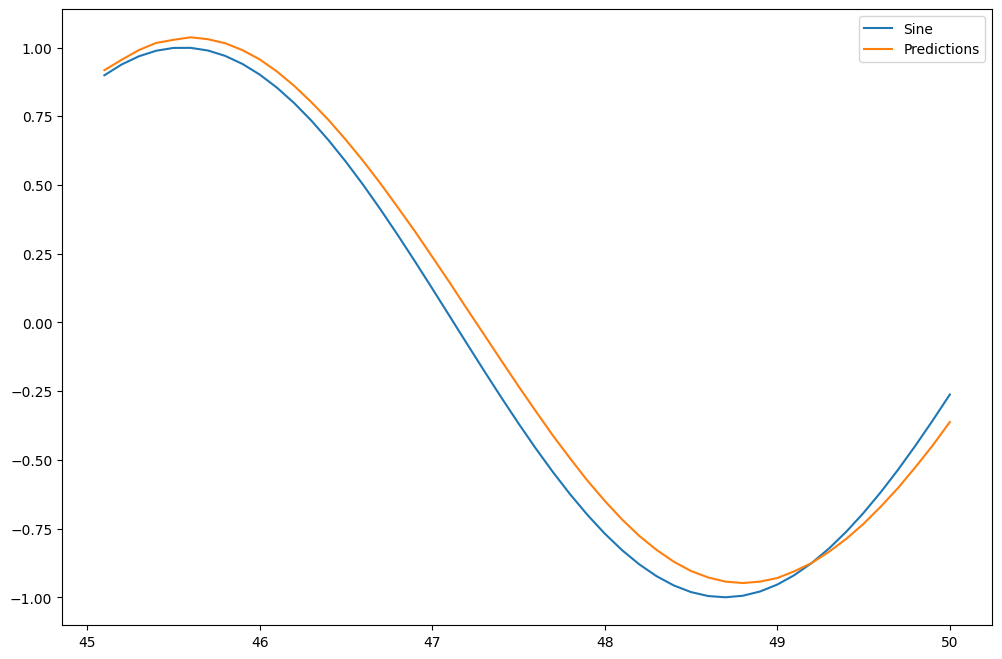

In [60]:
test.plot(figsize=(12,8))

In [63]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [65]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)